In [1]:
#Usemos el kernel gaussiano para suavizar datos

#Importamos las librerias necesarias

# No se tiene el ajuste
# 2.5  

import pandas as pd

df=pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv')

df.head()


OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0

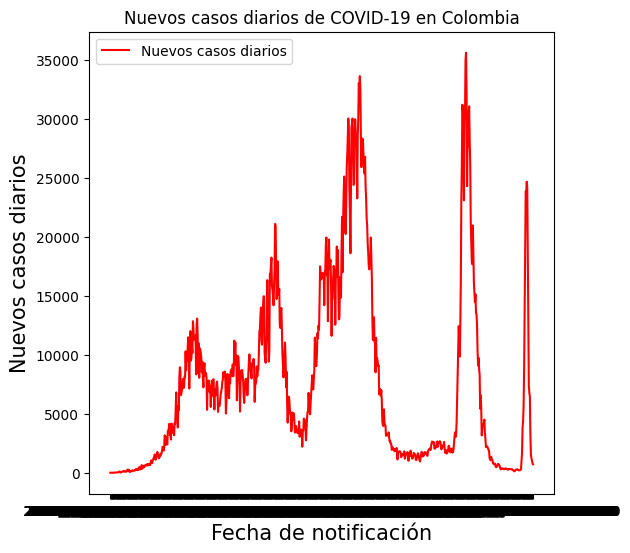

In [2]:
#GRafiquemos los nuevos casos diarios de COVID-19 en Colombia

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(df['FECHA_ACTUALIZACION'],df['NUEVOS_CASOS'],color='red',label='Nuevos casos diarios')
plt.title('Nuevos casos diarios de COVID-19 en Colombia')
plt.xlabel('Fecha de notificación',fontsize=15)
plt.ylabel('Nuevos casos diarios',fontsize=15)
plt.legend()


In [3]:
#Normalizando los datos

df_mas=df.copy()
#POner una nueva columna 
df_mas['NUEVOS_CASOS_NORM']=df_mas['NUEVOS_CASOS']/df_mas['NUEVOS_CASOS'].max()

In [4]:
df_mas.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  NUEVOS_CASOS_NORM  
0               0                  0           0.000028  
1               0                  0           0.000000  
2               0                  0           0.000000  
3               0                  0           0.000056  
4               0                  0           0.000000

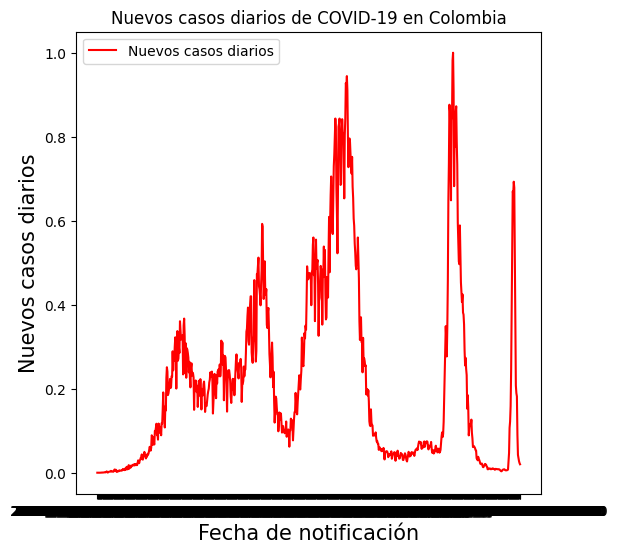

In [5]:
#Grafiquemos los nuevos casos diarios de COVID-19 en Colombia

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(df_mas['FECHA_ACTUALIZACION'],df_mas['NUEVOS_CASOS_NORM'],color='red',label='Nuevos casos diarios')    
plt.title('Nuevos casos diarios de COVID-19 en Colombia')
plt.xlabel('Fecha de notificación',fontsize=15)
plt.ylabel('Nuevos casos diarios',fontsize=15)
plt.legend()


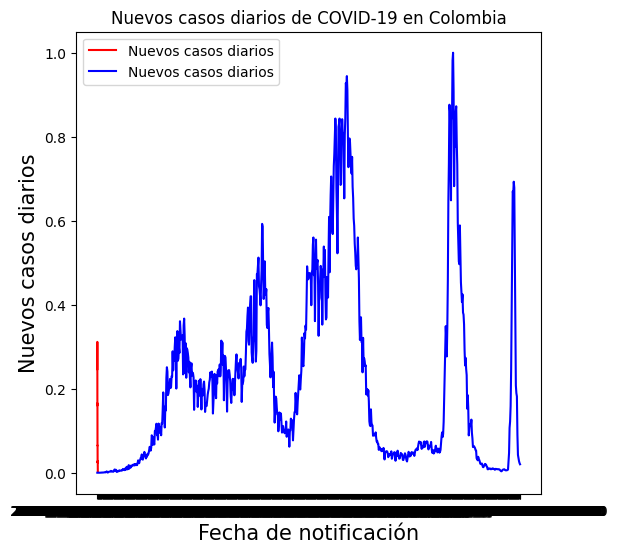

In [6]:
#Aplicar el kernel de Epanechnikov a mano
#Definimos el kernel de Epanechnikov para x y x_n
import numpy as np
def kernel(x,x_n,h):
    u=(x-x_n)/h
    if np.abs(u)<=1:
        return 3/4*(1-u**2)
    else:
        return 0
    
#Suavisemos los datos de nuevos casos diarios de COVID-19 en Colombia

#Definimos el ancho de banda
h=0.1

#Definimos el rango de x
x=np.linspace(0,1,100)

#Definimos el rango de x_n
x_n=df_mas['NUEVOS_CASOS_NORM']

#Definimos el rango de y
y=[]
for i in range(len(x)):

    suma=0
    for j in range(len(x_n)):
        suma+=kernel(x[i],x_n[j],h)
    y.append(suma/len(x_n))

#Grafiquemos los nuevos casos diarios de COVID-19 en Colombia

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(x,y,color='red',label='Nuevos casos diarios')
plt.plot(df_mas['FECHA_ACTUALIZACION'],df_mas['NUEVOS_CASOS_NORM'],color='blue',label='Nuevos casos diarios')
plt.title('Nuevos casos diarios de COVID-19 en Colombia')
plt.xlabel('Fecha de notificación',fontsize=15)
plt.ylabel('Nuevos casos diarios',fontsize=15)
plt.legend()


    


